In [1]:
!nvidia-smi

Mon May 20 10:26:34 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.129.03             Driver Version: 535.129.03   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   40C    P8              10W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [2]:
import os
HOME = os.getcwd()
print(HOME)

/kaggle/working


In [3]:
!pip install ultralytics==8.0.196

from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.0.196 🚀 Python-3.10.13 torch-2.1.2 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (4 CPUs, 31.4 GB RAM, 5597.6/8062.4 GB disk)


In [4]:
from ultralytics import YOLO

from IPython.display import display, Image

In [5]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="5JnDseY3Ntdoxlcgfuyh")
project = rf.workspace("graduate-na-ni").project("artipath")
version = project.version(2)
dataset = version.download("yolov8")

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 74.9/74.9 kB 3.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 158.3/158.3 kB 7.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 178.7/178.7 kB 15.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 5.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.1/49.1 MB 34.1 MB/s eta 0:00:00:00:0100:01
  Attempting uninstall: opencv-python-headless
    Found existing installation: opencv-python-headless 4.9.0.80
    Uninstalling opencv-python-headless-4.9.0.80:
      Successfully uninstalled opencv-python-headless-4.9.0.80
  Attempting uninstall: idna
    Found existing installation: idna 3.6
    Uninstalling idna-3.6:
      Successfully uninstalled idna-3.6
  Attempting uninstall: cycler
    Found existing installation: cycler 0.12.1
    Uninstalling cycler-0.12.1:
      Successfully uninstalled cycler-0.12.1
  Attempting uninstall: certifi
    Found existing installation: certifi 20


Extracting Dataset Version Zip to ArtiPath-2 in yolov8:: 100%|██████████| 3315/3315 [00:00<00:00, 6592.20it/s]


In [6]:
%cd {HOME}

!yolo task=detect mode=train model=yolov8m.pt data={dataset.location}/data.yaml epochs=80 plots=True

/kaggle/working
100%|███████████████████████████████████████| 49.7M/49.7M [00:00<00:00, 211MB/s]
New https://pypi.org/project/ultralytics/8.2.18 available 😃 Update with 'pip install -U ultralytics'
Ultralytics YOLOv8.0.196 🚀 Python-3.10.13 torch-2.1.2 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8m.pt, data=/kaggle/working/ArtiPath-2/data.yaml, epochs=80, patience=50, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=None, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, sh

In [7]:
!ls {HOME}/runs/detect/train/

F1_curve.png					   train_batch1.jpg
PR_curve.png					   train_batch2.jpg
P_curve.png					   train_batch6650.jpg
R_curve.png					   train_batch6651.jpg
args.yaml					   train_batch6652.jpg
confusion_matrix.png				   val_batch0_labels.jpg
confusion_matrix_normalized.png			   val_batch0_pred.jpg
events.out.tfevents.1716200862.c69c9074e0fa.102.0  val_batch1_labels.jpg
labels.jpg					   val_batch1_pred.jpg
labels_correlogram.jpg				   val_batch2_labels.jpg
results.csv					   val_batch2_pred.jpg
results.png					   weights
train_batch0.jpg


/kaggle/working


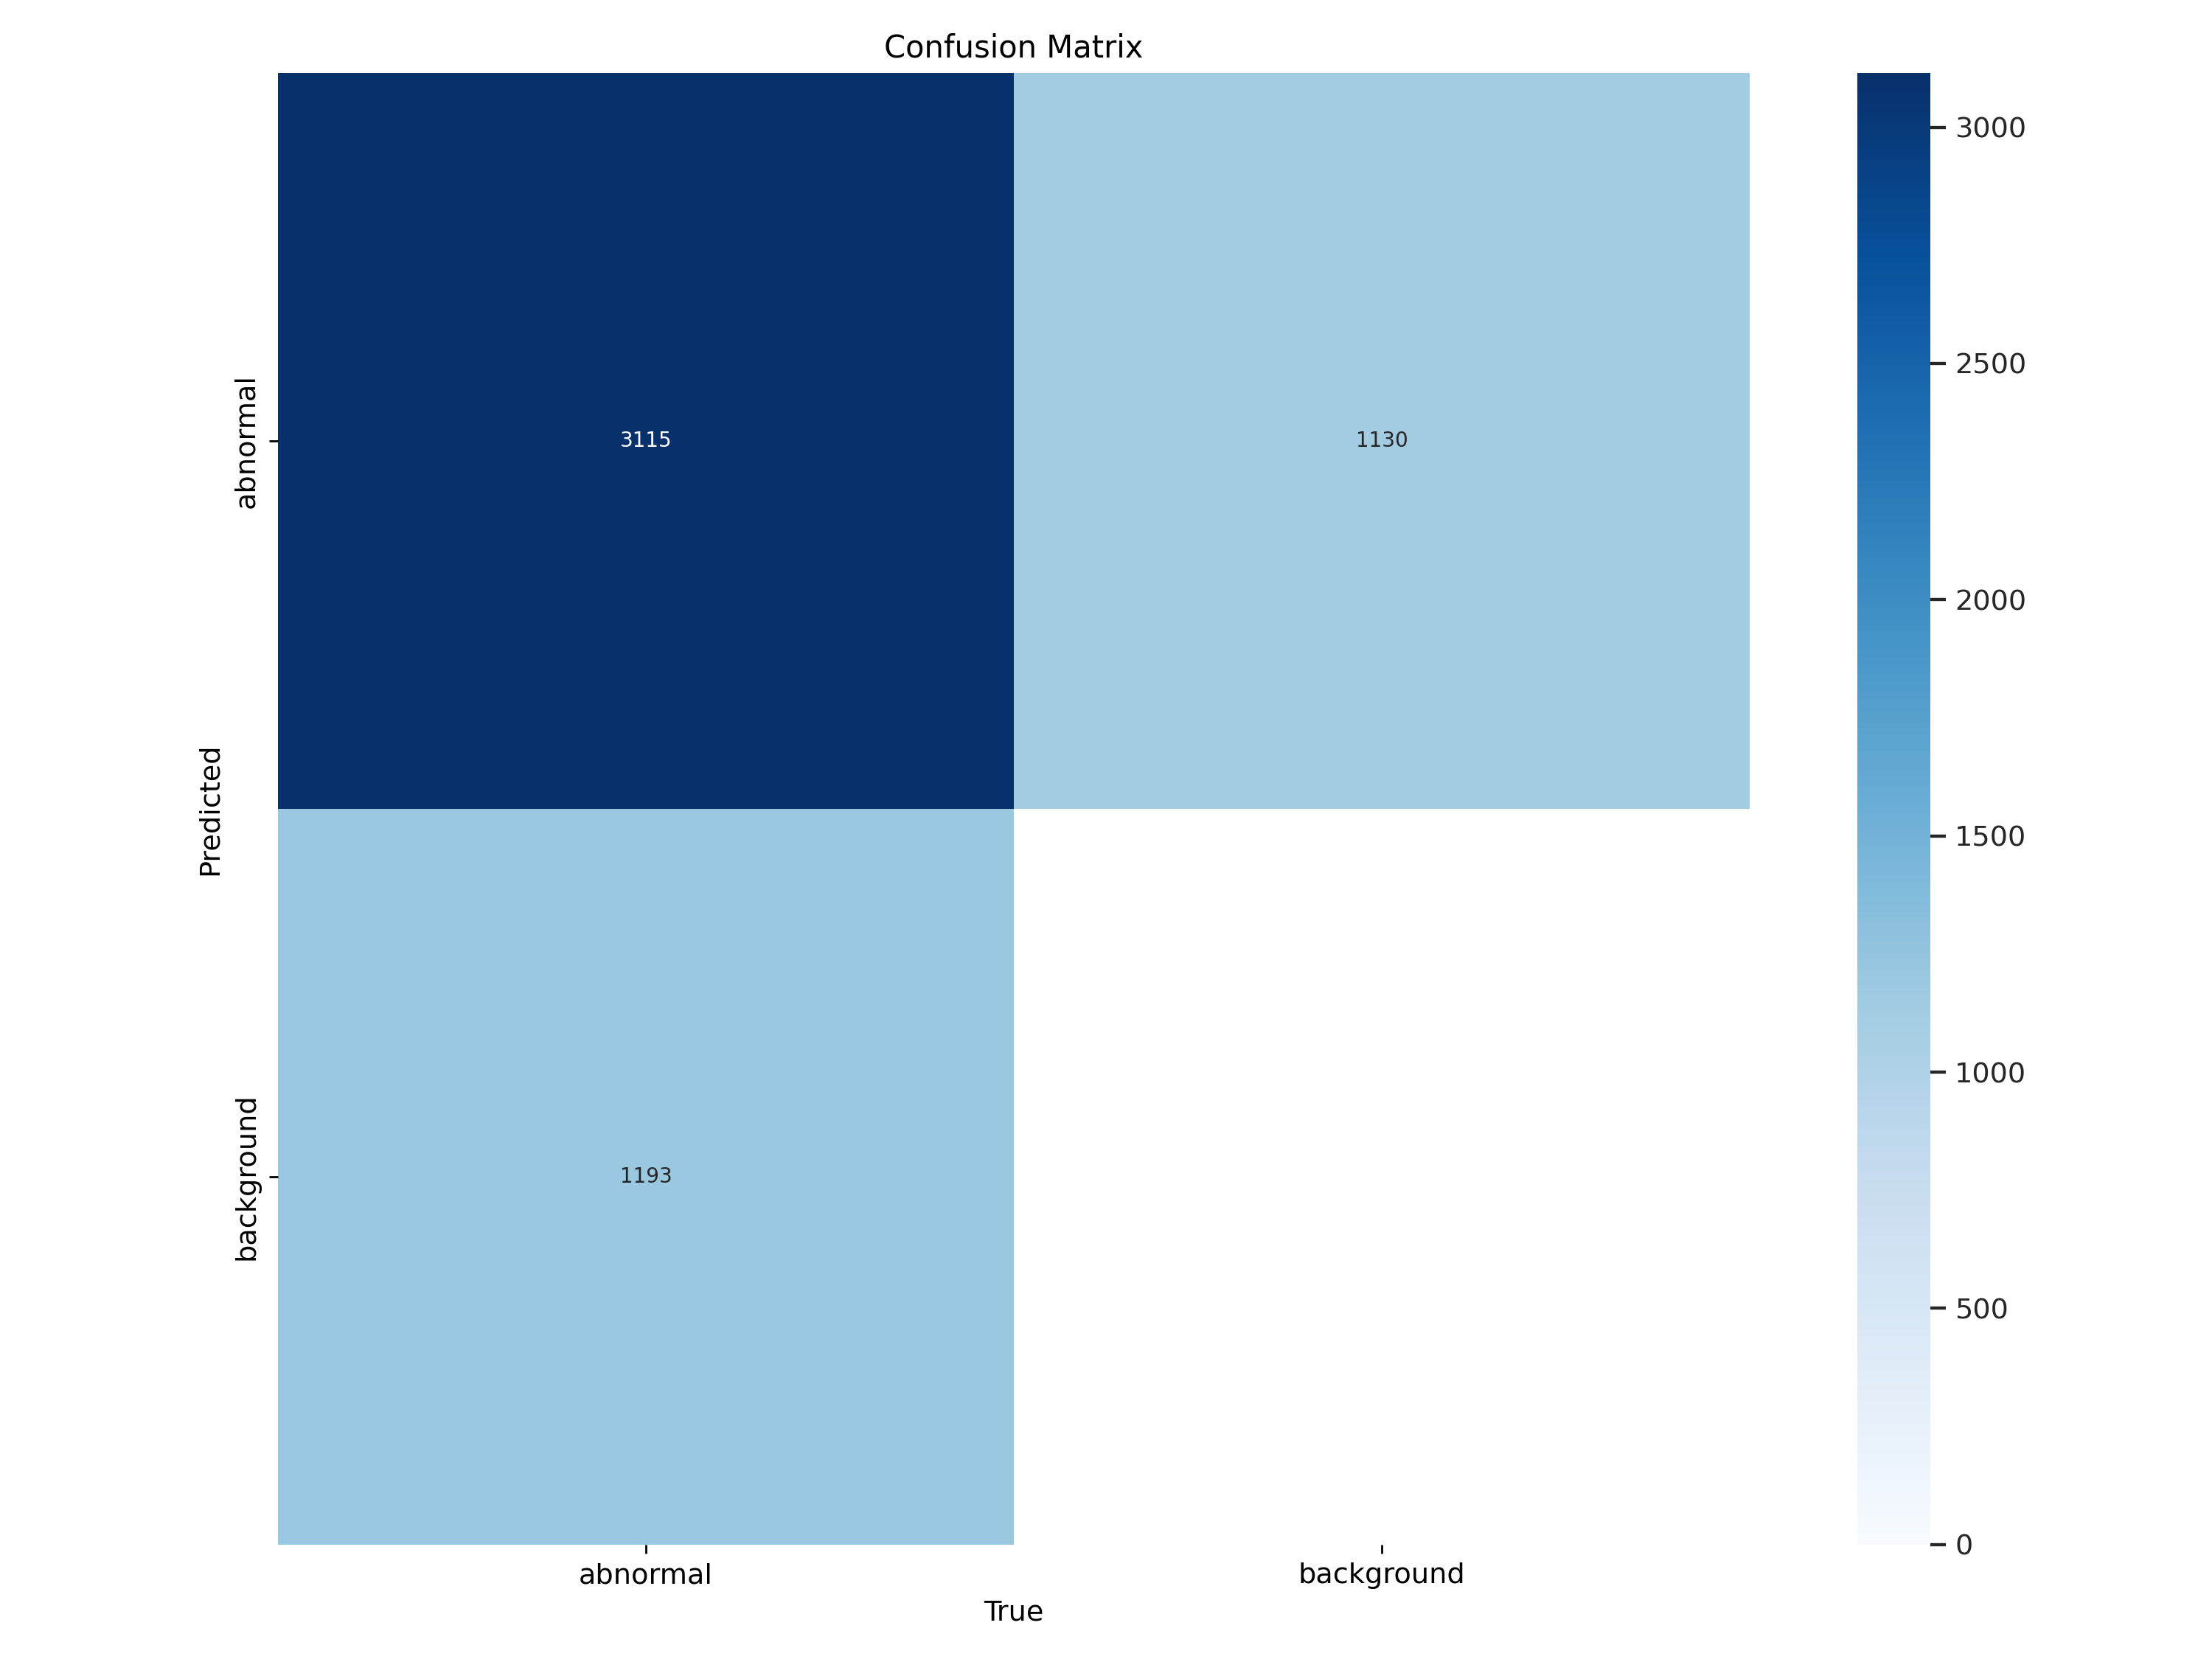

In [8]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/confusion_matrix.png', width=600)

/kaggle/working


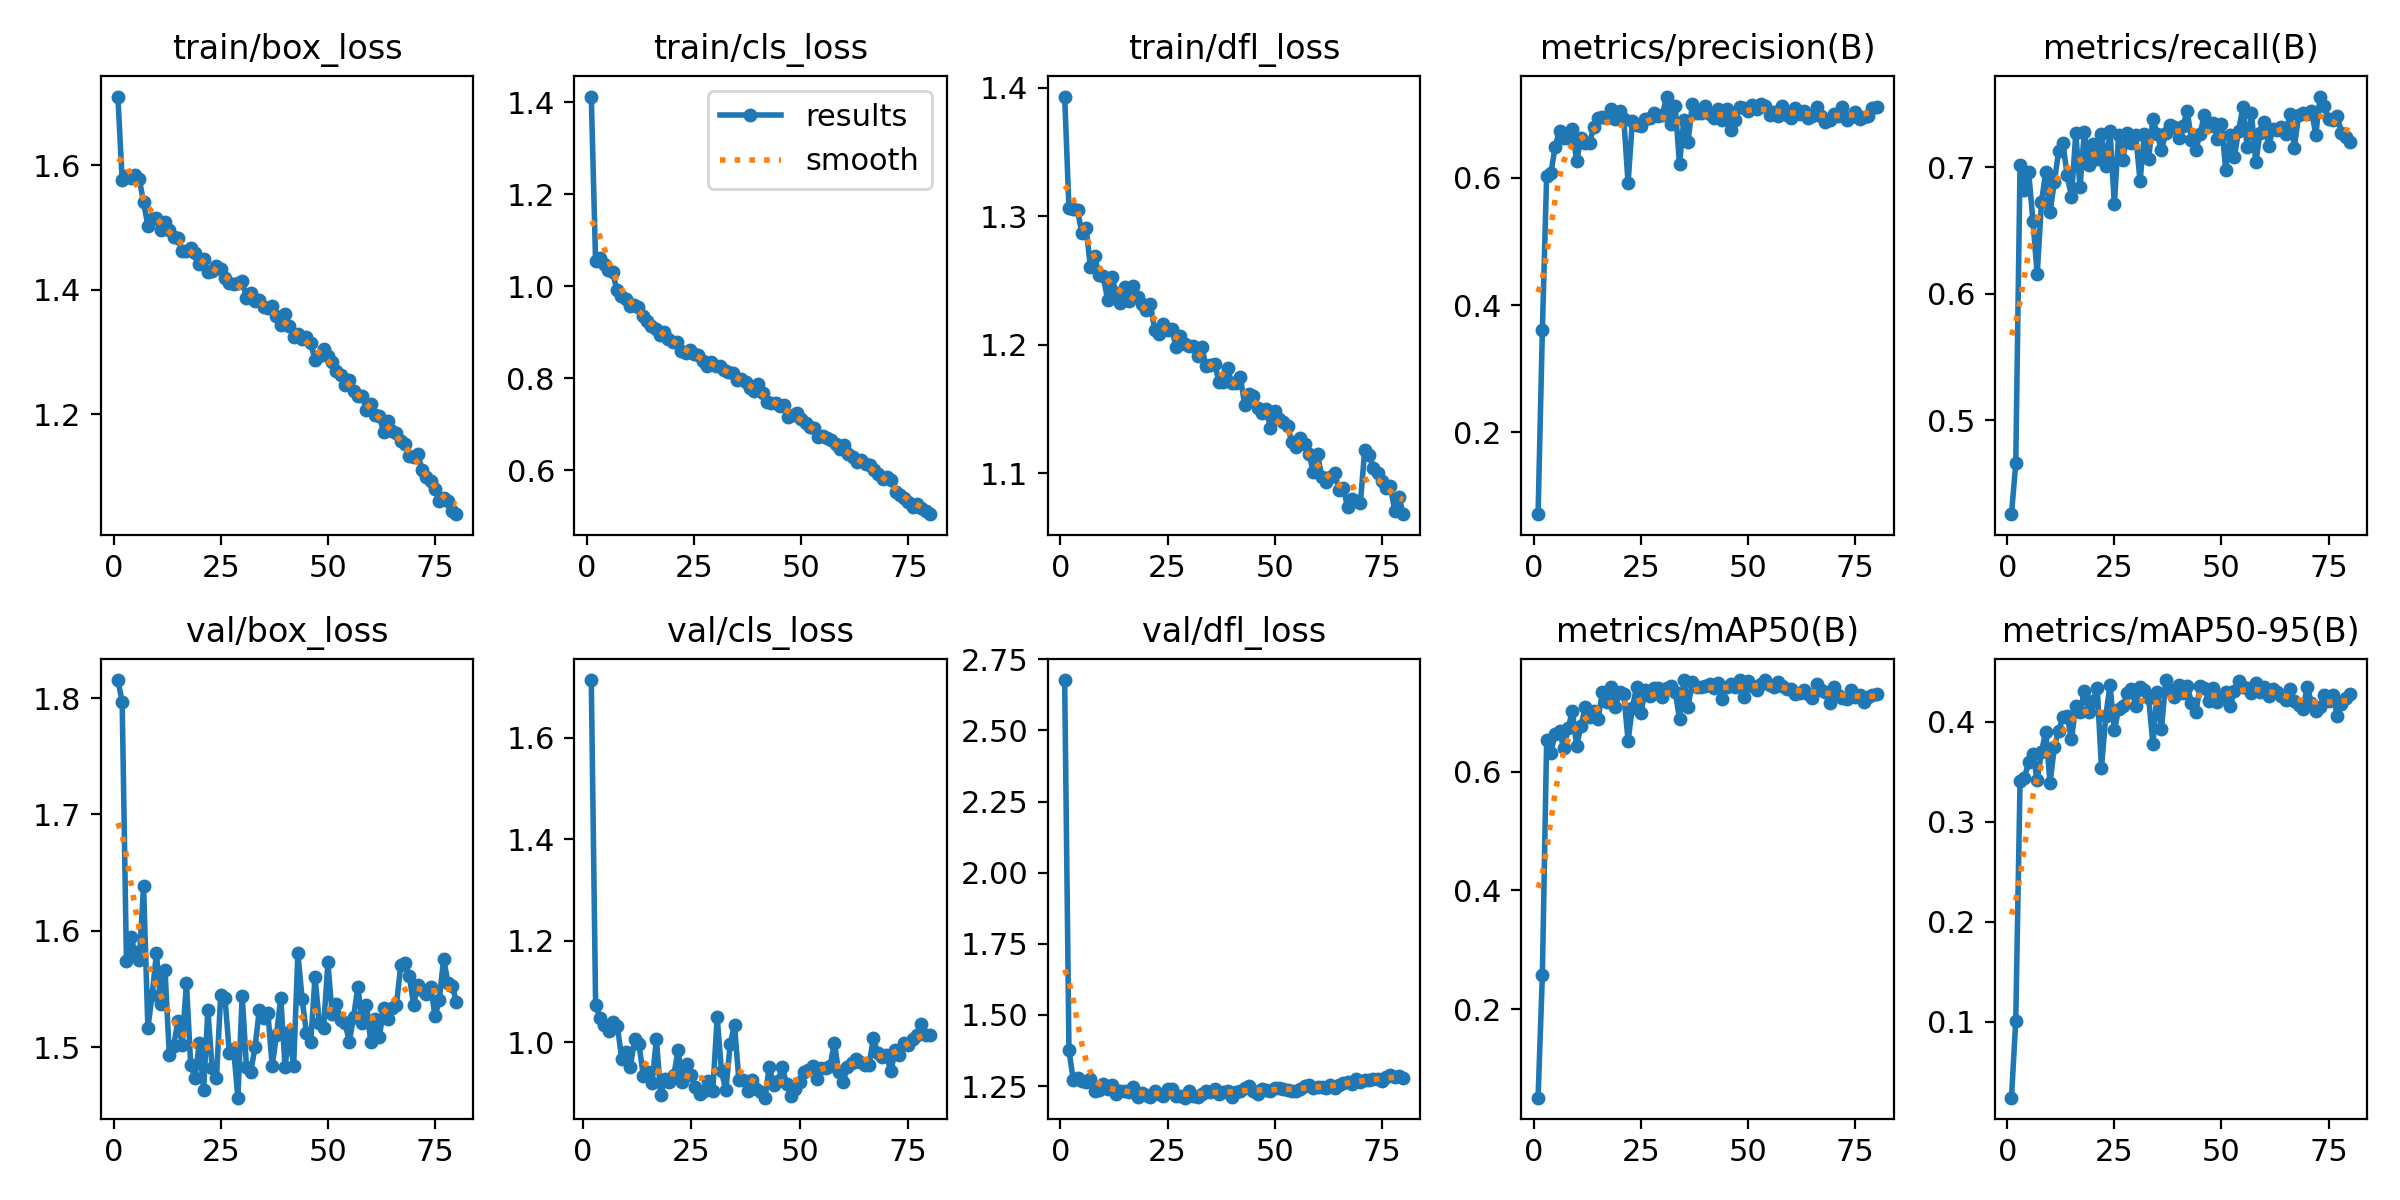

In [9]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/results.png', width=600)

/kaggle/working


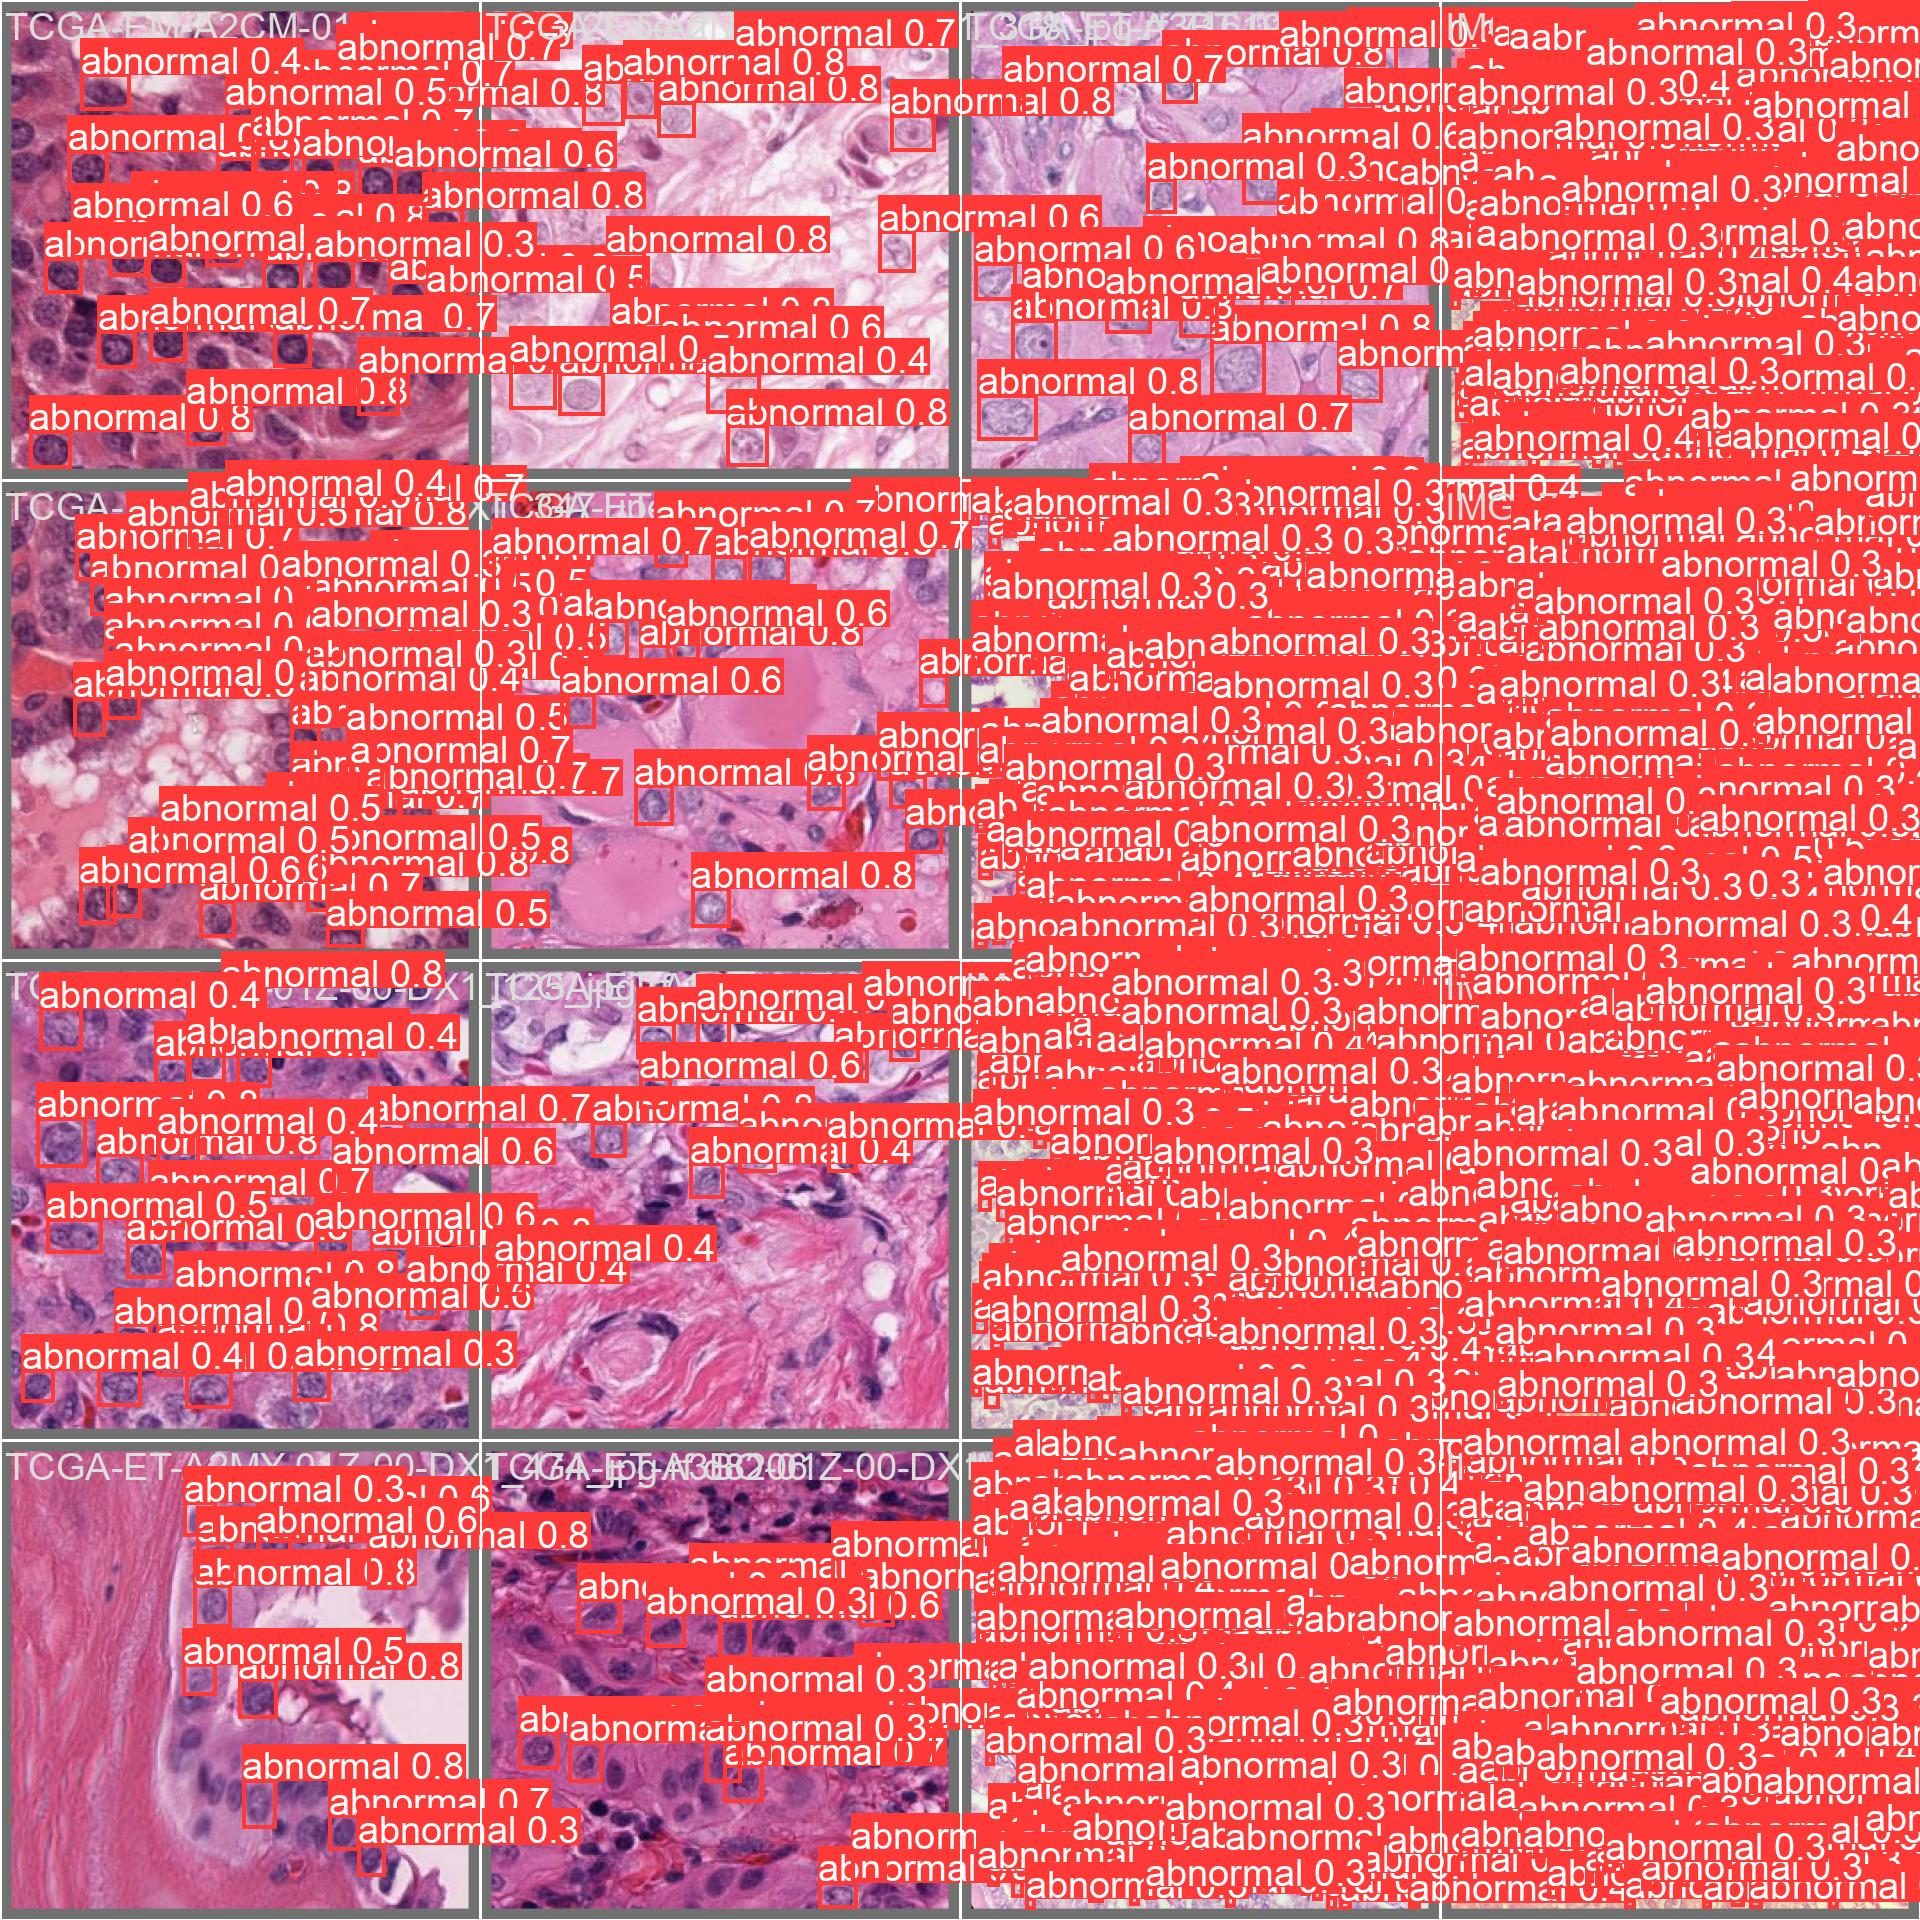

In [10]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/val_batch0_pred.jpg', width=600)

In [11]:
%cd {HOME}

!yolo task=detect mode=val model={HOME}/runs/detect/train/weights/best.pt data={dataset.location}/data.yaml

/kaggle/working
Ultralytics YOLOv8.0.196 🚀 Python-3.10.13 torch-2.1.2 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 218 layers, 25840339 parameters, 0 gradients, 78.7 GFLOPs
val: Scanning /kaggle/working/ArtiPath-2/valid/labels.cache... 90 images, 0 back
                 Class     Images  Instances      Box(P          R      mAP50  mWARNING ⚠️ NMS time limit 1.300s exceeded
                 Class     Images  Instances      Box(P          R      mAP50  m
                   all         90       4308      0.706      0.704      0.724      0.428
Speed: 3.2ms preprocess, 24.9ms inference, 0.0ms loss, 27.0ms postprocess per image
Results saved to runs/detect/val
💡 Learn more at https://docs.ultralytics.com/modes/val


In [12]:
%cd {HOME}
!yolo task=detect mode=predict model={HOME}/runs/detect/train/weights/best.pt conf=0.25 source={dataset.location}/test/images save=True

/kaggle/working
Ultralytics YOLOv8.0.196 🚀 Python-3.10.13 torch-2.1.2 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 218 layers, 25840339 parameters, 0 gradients, 78.7 GFLOPs

WARNING ⚠️ NMS time limit 0.550s exceeded
image 1/42 /kaggle/working/ArtiPath-2/test/images/IMG_7394_jpg.rf.ea4126e11e95780bd139ba7ab57ceb25.jpg: 640x640 282 abnormals, 37.9ms
image 2/42 /kaggle/working/ArtiPath-2/test/images/IMG_7406_jpg.rf.51baf823a8d00d39cb9bf01607d453bf.jpg: 640x640 78 abnormals, 37.1ms
image 3/42 /kaggle/working/ArtiPath-2/test/images/IMG_7426_jpg.rf.22e5ba5f2be67d1b5b070b5dd742b6dd.jpg: 640x640 146 abnormals, 37.0ms
image 4/42 /kaggle/working/ArtiPath-2/test/images/TCGA-BJ-A0Z9-01Z-00-DX1_136_jpg.rf.93f3bff091dd84d94f6048ff1af00d01.jpg: 640x640 4 abnormals, 37.0ms
image 5/42 /kaggle/working/ArtiPath-2/test/images/TCGA-BJ-A0ZC-01Z-00-DX1_391_jpg.rf.3ced97344a87a17e5c61786bb43a35ae.jpg: 640x640 19 abnormals, 37.0ms
image 6/42 /kaggle/working/ArtiPath-2/test/images/TCGA-BJ-A0ZF-01Z-00-DX1_

In [ ]:
!yolo task=detect mode=predict model={HOME}/runs/detect/train/weights/best.pt source="/kaggle/input/testdata2/testdata2.mp4" save = True

Ultralytics YOLOv8.0.196 🚀 Python-3.10.13 torch-2.1.2 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 218 layers, 25840339 parameters, 0 gradients, 78.7 GFLOPs

video 1/1 (1/282) /kaggle/input/testdata2/testdata2.mp4: 384x640 44 abnormals, 73.4ms
video 1/1 (2/282) /kaggle/input/testdata2/testdata2.mp4: 384x640 43 abnormals, 25.1ms
video 1/1 (3/282) /kaggle/input/testdata2/testdata2.mp4: 384x640 43 abnormals, 25.1ms
video 1/1 (4/282) /kaggle/input/testdata2/testdata2.mp4: 384x640 44 abnormals, 25.1ms
video 1/1 (5/282) /kaggle/input/testdata2/testdata2.mp4: 384x640 43 abnormals, 25.1ms
video 1/1 (6/282) /kaggle/input/testdata2/testdata2.mp4: 384x640 42 abnormals, 25.0ms
video 1/1 (7/282) /kaggle/input/testdata2/testdata2.mp4: 384x640 43 abnormals, 25.0ms
video 1/1 (8/282) /kaggle/input/testdata2/testdata2.mp4: 384x640 43 abnormals, 25.1ms
video 1/1 (9/282) /kaggle/input/testdata2/testdata2.mp4: 384x640 42 abnormals, 25.1ms
video 1/1 (10/282) /kaggle/input/testdata2/testdata2.mp4: 384x